<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمه ای بر شبکه‌های عصبی کانولوشنالی<br>Convolutionl Neural Networks - CNN</div></center></h1>

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مقدمه ای بر شبکه‌های عصبی کانولوشنالی(Convolutionl Neural Networks - CNN)</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در ابتدا معماری شبکه را مشخص میکنیم.
<br>
به لایه های conv و pool دقت کنید.
<br>
قبل از اولین لایه Dense یا Fully Connected همیشه متد Flatten فراخوانی میشود تا نورون ها به صورت یک وکتور در بیایند.
</div>

In [1]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


Using TensorFlow backend.


<div style="direction:rtl;text-align:right;font-family:Tahoma">
نگاهی به تنسور وردی و خروجی هر لایه بیندازیم.
<br>
تصویر ورودی 28x28x3 بوده است
</div>

In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">کد یک شبکه کانولوشنالی و آموزش آن از ابتدا تا انتها بر روی مجموعه داده هدی</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
تصاویر مجموعه داده هدی در تابعی که قبلا نوشته ایم، load_hoda به صورت flat شده و یک وکتور در آمده اند.
<br>
در این فراخوانی طول و عرض تصاویر 28 قرار داده شده است، پس خروجی این تابع وکتورهای 784تایی است.
<br>
** دقت کنید که قبل از ورودی شبکه کانولوشنالی تصویر را به شکل اصلی خود یعنی 28x28 برگردانده ایم.**
<br>
همچنین چون تصاویر سیاه و سفید است تعداد کانال تصویر را 1 قرار داده ایم.
</div>

In [3]:
# 1. Import libraries and modules
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

np.random.seed(123)  # for reproducibility

# Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=3500,
                                                                        test_sample_size=400,size=28)

# Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)


# test and validation set
x_val = x_test[200:]
x_test = x_test[:200]
y_val = y_test[200:]
y_test = y_test[:200]

# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 7. Fit model on training data
history = model.fit(x_train, y_train,
          epochs=200, batch_size=256, validation_data = (x_val, y_val))



Train on 3500 samples, validate on 200 samples
Epoch 1/200
3500/3500 [==============================] - 9s 2ms/step - loss: 2.0756 - acc: 0.3260 - val_loss: 1.4534 - val_acc: 0.6900
Epoch 2/200
3500/3500 [==============================] - 0s 129us/step - loss: 1.2065 - acc: 0.5831 - val_loss: 0.6575 - val_acc: 0.7900
Epoch 3/200
3500/3500 [==============================] - 0s 123us/step - loss: 0.8136 - acc: 0.7154 - val_loss: 0.4636 - val_acc: 0.8200
Epoch 4/200
3500/3500 [==============================] - 1s 218us/step - loss: 0.6303 - acc: 0.7789 - val_loss: 0.2585 - val_acc: 0.9150
Epoch 5/200
3500/3500 [==============================] - 1s 155us/step - loss: 0.4911 - acc: 0.8334 - val_loss: 0.1975 - val_acc: 0.9600
Epoch 6/200
3500/3500 [==============================] - 1s 148us/step - loss: 0.4238 - acc: 0.8551 - val_loss: 0.1681 - val_acc: 0.9550
Epoch 7/200
3500/3500 [==============================] - 0s 138us/step - loss: 0.3701 - acc: 0.8746 - val_loss: 0.1258 - val_acc: 0.9

3500/3500 [==============================] - 0s 127us/step - loss: 0.0358 - acc: 0.9851 - val_loss: 0.0434 - val_acc: 0.9800
Epoch 61/200
3500/3500 [==============================] - 0s 125us/step - loss: 0.0284 - acc: 0.9923 - val_loss: 0.0377 - val_acc: 0.9900
Epoch 62/200
3500/3500 [==============================] - 0s 126us/step - loss: 0.0289 - acc: 0.9903 - val_loss: 0.0348 - val_acc: 0.9850
Epoch 63/200
3500/3500 [==============================] - 0s 124us/step - loss: 0.0359 - acc: 0.9874 - val_loss: 0.0281 - val_acc: 0.9900
Epoch 64/200
3500/3500 [==============================] - 0s 123us/step - loss: 0.0281 - acc: 0.9886 - val_loss: 0.0520 - val_acc: 0.9900
Epoch 65/200
3500/3500 [==============================] - 0s 121us/step - loss: 0.0274 - acc: 0.9903 - val_loss: 0.0595 - val_acc: 0.9800
Epoch 66/200
3500/3500 [==============================] - 0s 124us/step - loss: 0.0303 - acc: 0.9897 - val_loss: 0.0275 - val_acc: 0.9850
Epoch 67/200
3500/3500 [=======================

3500/3500 [==============================] - 0s 125us/step - loss: 0.0166 - acc: 0.9943 - val_loss: 0.0539 - val_acc: 0.9850
Epoch 120/200
3500/3500 [==============================] - 0s 124us/step - loss: 0.0183 - acc: 0.9929 - val_loss: 0.0519 - val_acc: 0.9850
Epoch 121/200
3500/3500 [==============================] - 0s 125us/step - loss: 0.0179 - acc: 0.9943 - val_loss: 0.0625 - val_acc: 0.9900
Epoch 122/200
3500/3500 [==============================] - 0s 124us/step - loss: 0.0153 - acc: 0.9940 - val_loss: 0.0819 - val_acc: 0.9850
Epoch 123/200
3500/3500 [==============================] - 0s 128us/step - loss: 0.0136 - acc: 0.9957 - val_loss: 0.0365 - val_acc: 0.9900
Epoch 124/200
3500/3500 [==============================] - 0s 125us/step - loss: 0.0093 - acc: 0.9974 - val_loss: 0.0780 - val_acc: 0.9750
Epoch 125/200
3500/3500 [==============================] - 0s 125us/step - loss: 0.0171 - acc: 0.9931 - val_loss: 0.0803 - val_acc: 0.9800
Epoch 126/200
3500/3500 [================

Epoch 178/200
3500/3500 [==============================] - 0s 129us/step - loss: 0.0086 - acc: 0.9969 - val_loss: 0.1004 - val_acc: 0.9850
Epoch 179/200
3500/3500 [==============================] - 0s 123us/step - loss: 0.0120 - acc: 0.9963 - val_loss: 0.1174 - val_acc: 0.9850
Epoch 180/200
3500/3500 [==============================] - 0s 126us/step - loss: 0.0109 - acc: 0.9969 - val_loss: 0.1019 - val_acc: 0.9850
Epoch 181/200
3500/3500 [==============================] - 0s 125us/step - loss: 0.0105 - acc: 0.9963 - val_loss: 0.1250 - val_acc: 0.9750
Epoch 182/200
3500/3500 [==============================] - 0s 125us/step - loss: 0.0068 - acc: 0.9971 - val_loss: 0.1096 - val_acc: 0.9750
Epoch 183/200
3500/3500 [==============================] - 0s 126us/step - loss: 0.0090 - acc: 0.9960 - val_loss: 0.1001 - val_acc: 0.9850
Epoch 184/200
3500/3500 [==============================] - 0s 126us/step - loss: 0.0105 - acc: 0.9954 - val_loss: 0.0724 - val_acc: 0.9850
Epoch 185/200
3500/3500 [==

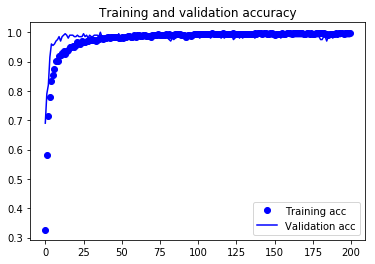

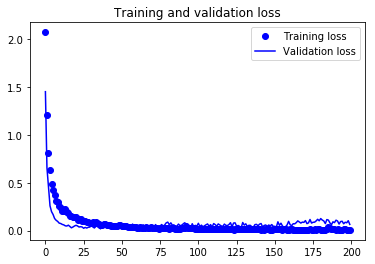

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دوره مقدماتی یادگیری عمیق<br>علیرضا اخوان پور<br>  23 و 30 آبان 1397<br>
</div>
<a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a> - <a href="https://github.com/Alireza-Akhavan/">GitHub</a>

</div>